<a href="https://colab.research.google.com/github/ayeshahabib01/github-introfall25-ayeshahabib01/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# upload the spam data
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [3]:
# double checking it loaded correctly

import pandas as pd
df = pd.read_csv('spam.csv')
display(df.head())

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# prep for 27 - 32

# remove all the duplicates from the full dataset
df = df.drop_duplicates(subset=['v2'])


In [5]:
# 26

# check current column names
print(df.columns)

# Construct a dataframe called spamonly consisting of only spam SMS (keep in mind the current column names). How many duplicates are there in this new dataframe?
spamonly = df[df['v1'] == 'spam']
print(spamonly.duplicated().sum())


Index(['v1', 'v2'], dtype='object')
0


In [ ]:
# 27

# What is the total number of SMS in the spamonly dataframe after removing duplicates?
print(len(spamonly))


653


In [6]:
# 28

# find average length (characters_count) of all messages in the full SMS dataset (round to 2 decimal places)?
df['characters_count'] = df['v2'].str.len()
print(round(df['characters_count'].mean(), 2))




78.98


In [ ]:
# 29

# find maximum sentences_count in the (duplicate free full) SMS dataset?

import re

# Count sentences ending with ., !, or ?
df['sentences_count'] = df['v2'].apply(lambda x: len(re.findall(r'[.!?]', x)))
df['sentences_count'].max()





42

In [1]:
# 30

# find the minimum words_count in the duplicate free full SMS dataset?
df['words_count'] = df['v2'].apply(lambda x: len(x.split()))
df['words_count'].min()



NameError: name 'df' is not defined

In [ ]:
# 31

# What is the highest number of captial letters in the first five SMS of the duplicate free full dataset?

# Get the first five SMS from the duplicate-free full dataset
first_five_sms = df['v2'].head()

# Function to count capital letters in a string
def count_capital_letters(text):
    return sum(1 for char in text if char.isupper())

# Apply the function to each of the first five SMS and find the maximum
highest_capital_count = first_five_sms.apply(count_capital_letters).max()

print(f"The highest number of capital letters in the first five SMS is: {highest_capital_count}")


The highest number of capital letters in the first five SMS is: 10


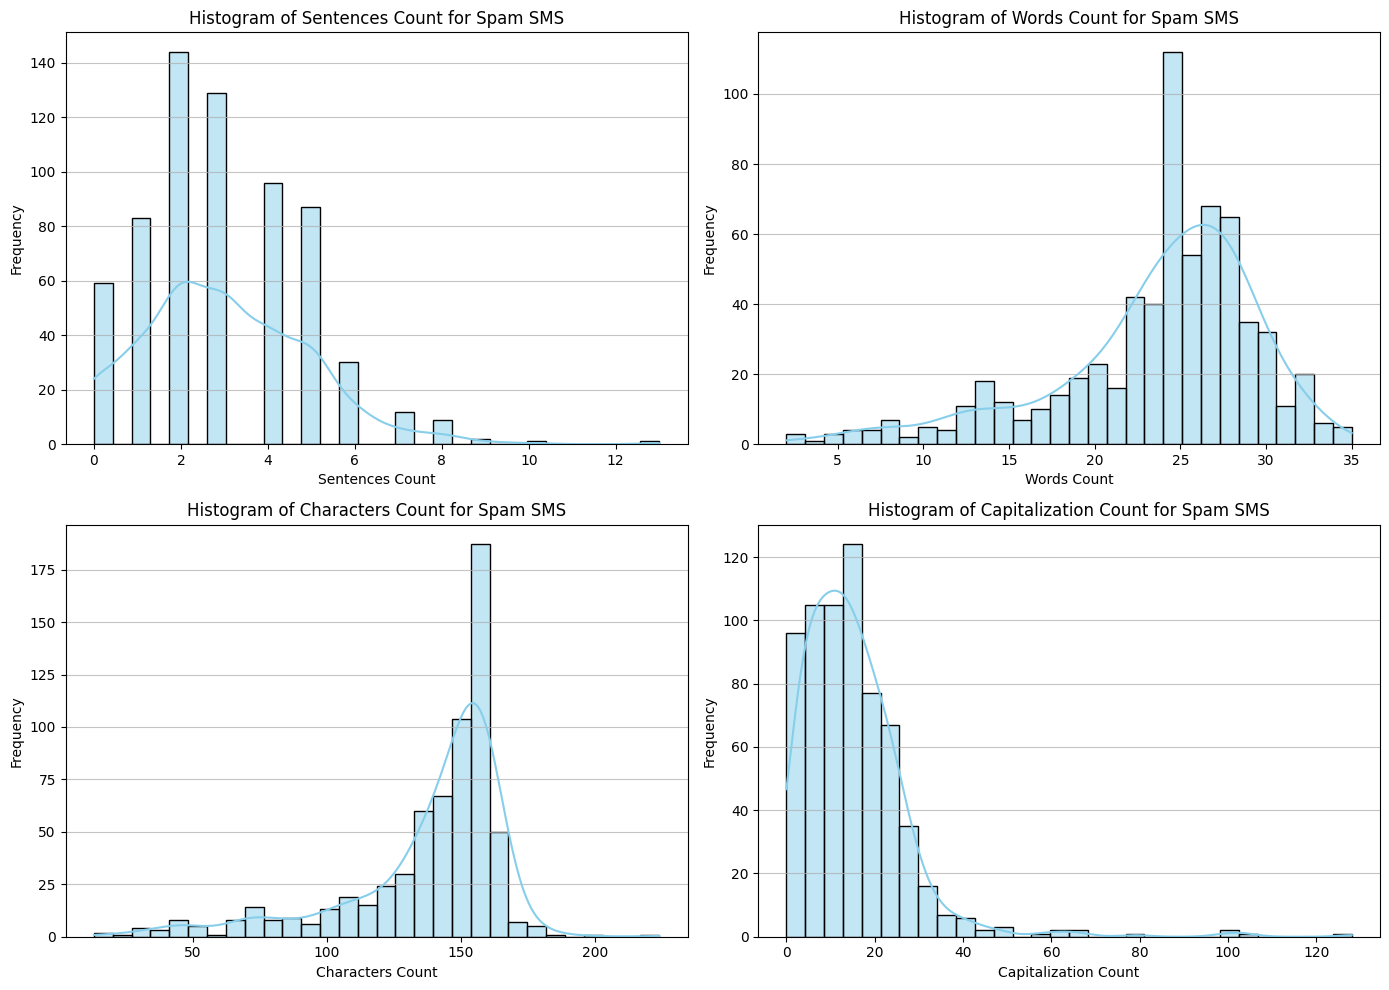

In [ ]:
# 32

import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for spam messages, ensuring all feature columns are included
spam_df = df[df['v1'] == 'spam'].copy()

# Function to count capital letters in a string
def count_capital_letters(text):
    return sum(1 for char in text if char.isupper())

# Add capitalization_count feature to the spam_df
spam_df['capitalization_count'] = spam_df['v2'].apply(count_capital_letters)

# Define the features to plot
features = ['sentences_count', 'words_count', 'characters_count', 'capitalization_count']

# Create histograms for each feature
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(spam_df[feature], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {feature.replace("_", " ").title()} for Spam SMS')
    axes[i].set_xlabel(feature.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# sentence count and capitalization count are righ skewed



In [ ]:
# 33

# Which variable (numeric_count, capitalization, words_count, sentences_count) has the highest correlation with the target_encoded variable (created using LabelEncoder on target variable) in the duplicate free whole SMS dataset?

from sklearn.preprocessing import LabelEncoder
import re

# Create target_encoded variable
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['v1'])

# Calculate numeric_count
df['numeric_count'] = df['v2'].apply(lambda x: len(re.findall(r'\d', x)))

# Calculate capitalization_count for the full df (already defined for spam_df previously)
def count_capital_letters(text):
    return sum(1 for char in text if char.isupper())
df['capitalization_count'] = df['v2'].apply(count_capital_letters)

# Select the relevant columns for correlation analysis
correlation_features = ['numeric_count', 'capitalization_count', 'words_count', 'sentences_count', 'target_encoded']
correlation_df = df[correlation_features]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Get the correlations with the target_encoded variable
target_correlations = correlation_matrix['target_encoded'].drop('target_encoded')

# Find the feature with the highest absolute correlation
highest_correlation_variable = target_correlations.abs().idxmax()
highest_correlation_value = target_correlations[highest_correlation_variable]

print(f"Correlation with target_encoded variable:\n{target_correlations}")
print(f"\nThe variable with the highest correlation with 'target_encoded' is '{highest_correlation_variable}' with a correlation of {highest_correlation_value:.2f}")

Correlation with target_encoded variable:
numeric_count           0.835803
capitalization_count    0.337809
words_count             0.286576
sentences_count         0.075214
Name: target_encoded, dtype: float64

The variable with the highest correlation with 'target_encoded' is 'numeric_count' with a correlation of 0.84
